# Out-of-Africa with Archaic Introgression Simulation Analyses
## Dependecies & Functions
First we load the necessary packages.

In [1]:
# Import packages.
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
import scipy.stats as stats
from scipy.stats import norm

Next we define the functions that we will use in this notebook.

In [2]:
# Define a function to extract observed introgression values.
def load_obs_vals(prefix):
    """
    ###########################################################################
    INPUT: Load the results for ceu or chb.
    ---------------------------------------------------------------------------
    OUTPUT: Dictionary of observed introgression values from all replicate
            simulations.
    ###########################################################################
    """
    # Define the file path for the results.
    results_path = './sim_outputs/ooa_arc_intro/obs_vals/{0}_'.format(prefix)
    # Load observed site patterns.
    obs_abba = np.loadtxt(
        results_path+'abba.csv.gz',
        delimiter=',',
    )
    obs_baba = np.loadtxt(
        results_path+'baba.csv.gz',
        delimiter=',',
    )
    obs_baaa = np.loadtxt(
        results_path+'baaa.csv.gz',
        delimiter=',',
    )
    obs_abaa = np.loadtxt(
        results_path+'abaa.csv.gz',
        delimiter=',',
    )
    # Load observed introgression values.
    obs_d = np.loadtxt(
        results_path+'d.csv.gz',
        delimiter=',',
    )
    obs_danc = np.loadtxt(
        results_path+'danc.csv.gz',
        delimiter=',',
    )
    obs_dplus = np.loadtxt(
        results_path+'dplus.csv.gz',
        delimiter=',',
    )
    obs_fhom = np.loadtxt(
        results_path+'fhom.csv.gz',
        delimiter=',',
    )
    obs_fanc = np.loadtxt(
        results_path+'fanc.csv.gz',
        delimiter=',',
    )
    obs_fplus = np.loadtxt(
        results_path+'fplus.csv.gz',
        delimiter=',',
    )
    # Create a dictionary where key is the introgression metric and its
    # corresponding numpy array is the value.
    obs_vals_dict = {
        'abba': obs_abba, 'baaa': obs_baaa,
        'baba': obs_baba, 'abaa': obs_abaa,
        'd': obs_d,       'danc': obs_danc,
        'fhom': obs_fhom, 'fanc': obs_fanc,
        'dplus': obs_dplus, 'fplus': obs_fplus,
    }
    return obs_vals_dict

In [3]:
# Define a function to calculate the standard deviations of each bootstrapped distribution.
def load_bs_stds(prefix):
    """
    ###########################################################################
    INPUT: Load the results for ceu or chb.
    ---------------------------------------------------------------------------
    OUTPUT: Dictionary of standard deviations per bootstrapped distribution.
    ###########################################################################
    """
    # Intialize bootstrapped standard deviation arrays.
    std_d = np.array([])
    std_danc = np.array([])
    std_dplus = np.array([])
    # Calculate the bootstrapped standard deviation for all replicate simulations.
    for rep_id in range(1, 101):
        # Define the file path for the results.
        results_path = './sim_outputs/ooa_arc_intro/bootstraps/rep_id_{0}_{1}_'.format(rep_id, prefix)
        # Load the bootstrapped distributions.
        bs_abba = np.loadtxt(
            results_path+'abba.csv.gz',
            delimiter=',',
        )
        bs_baba = np.loadtxt(
            results_path+'baba.csv.gz',
            delimiter=',',
        )
        bs_baaa = np.loadtxt(
            results_path+'baaa.csv.gz',
            delimiter=',',
        )
        bs_abaa = np.loadtxt(
            results_path+'abaa.csv.gz',
            delimiter=',',
        )
        # Calculate bootstrapped introgression values.
        bs_d = ((bs_abba - bs_baba) / (bs_abba + bs_baba))
        bs_danc = ((bs_baaa - bs_abaa) / (bs_baaa + bs_abaa))
        bs_dplus = (((bs_abba - bs_baba) + (bs_baaa - bs_abaa)) / ((bs_abba + bs_baba) + (bs_baaa + bs_abaa)))
        # Calculate the standard deviations of each bootstrapped distribution.
        bs_std_d = np.std(bs_d)
        bs_std_danc = np.std(bs_danc)
        bs_std_dplus = np.std(bs_dplus)
        # Store the bootstrapped results for the replicate.
        std_d = np.append(std_d, bs_std_d)
        std_danc = np.append(std_danc, bs_std_danc)
        std_dplus = np.append(std_dplus, bs_std_dplus)
    # Create a dictionary where key is the introgression metric and its
    # corresponding numpy array is the value.
    bs_std_dict = {
        'd': std_d, 'danc': std_danc, 'dplus': std_dplus,
    }
    return bs_std_dict

In [4]:
# Define a function to calculate p-values for introgression detection metrics.
def calc_p_values(prefix):
    """
    ###########################################################################
    INPUT: Load the results for ceu or chb.
    ---------------------------------------------------------------------------
    OUTPUT: Dictionary of p-values for introgression detection metrics.
    ###########################################################################
    """
    # Load the observed values.
    obs_dict = load_obs_vals(prefix)
    # Load the bootstrapped standard deviations.
    bs_dict = load_bs_stds(prefix)
    # Use the survival function to calculate p-values.
    d_pval = norm.sf(x=obs_dict['d'], loc=0, scale=bs_dict['d'])
    danc_pval = norm.sf(x=obs_dict['danc'], loc=0, scale=bs_dict['danc'])
    dplus_pval = norm.sf(x=obs_dict['dplus'], loc=0, scale=bs_dict['dplus'])
    # Create a dictionary where key is the introgression metric and its
    # corresponding numpy array is the value.
    pval_dict = {
        'd': d_pval, 'danc': danc_pval, 'dplus': dplus_pval,
    }
    return pval_dict

In [5]:
# Define a function to calculate power for introgression detection metrics.
def calc_power(prefix):
    """
    ###########################################################################
    INPUT: Load the results for ceu or chb.
    ---------------------------------------------------------------------------
    OUTPUT: Dictionary of power values for introgression detection metrics.
    ###########################################################################
    """
    # Load the observed values.
    obs_dict = load_obs_vals(prefix)
    # Load the bootstrapped standard deviations.
    bs_dict = load_bs_stds(prefix)
    # Use the survival function to calculate p-values.
    d_pval = norm.sf(x=obs_dict['d'], loc=0, scale=bs_dict['d'])
    danc_pval = norm.sf(x=obs_dict['danc'], loc=0, scale=bs_dict['danc'])
    dplus_pval = norm.sf(x=obs_dict['dplus'], loc=0, scale=bs_dict['dplus'])
    # Calculate the power ie the number of significant replicates out of 100.
    d_power = np.mean(d_pval <= 0.05 )
    danc_power = np.mean(danc_pval <= 0.05 )
    dplus_power = np.mean(dplus_pval <= 0.05 )
    # Create a dictionary where key is the introgression metric and its
    # corresponding numpy array is the value.
    power_dict = {
        'd': d_power, 'danc': danc_power, 'dplus': dplus_power,
    }
    return power_dict

In [6]:
# LaTeX plotting helper function provided by Jack Walton (https://jwalton.info/Embed-Publication-Matplotlib-Latex/).
def set_size(width_pt=452, fraction=1, subplots=(1, 1)):
    """Set figure dimensions to avoid scaling in LaTeX.

    Parameters
    ----------
    width: float or string
            Document width in points, or string of predined document type
    fraction: float, optional
            Fraction of the width which you wish the figure to occupy
    subplots: array-like, optional
            The number of rows and columns of subplots.
    Returns
    -------
    fig_dim: tuple
            Dimensions of figure in inches
    """
    # Width of figure (in pts)
    fig_width_pt = width_pt * fraction
    # Convert from pt to inches
    inches_per_pt = 1 / 72.27
    # Golden ratio to set aesthetic figure height.
    golden_ratio = (5**.5 - 1) / 2
    # Figure width in inches.
    fig_width_in = fig_width_pt * inches_per_pt
    # Figure height in inches.
    fig_height_in = fig_width_in * golden_ratio * (subplots[0] / subplots[1])
    return (fig_width_in, fig_height_in)

Lastly, we load all of the observed values for analysis.

In [7]:
# Load the observed values.
ceu_obs_vals = load_obs_vals('ceu')
chb_obs_vals = load_obs_vals('chb')

## Site Pattern Trends

First, we consolidate the site pattern counts and calculate the differences.

In [8]:
# Consolidate the abba counts.
all_abba = np.array([ceu_obs_vals['abba'], chb_obs_vals['abba']])
# Consolidate the baba counts.
all_baba = np.array([ceu_obs_vals['baba'], chb_obs_vals['baba']])
# Consolidate the baaa counts.
all_baaa = np.array([ceu_obs_vals['baaa'], chb_obs_vals['baaa']])
# Consolidate the abaa counts.
all_abaa = np.array([ceu_obs_vals['abaa'], chb_obs_vals['abaa']])
# Calculate differences.
all_abba_baba = all_abba - all_baba
all_baaa_abaa = all_baaa - all_abaa

Next, we summarize the mean and standard deviation for all site patterns.

In [9]:
# Intialize an array of all focal populations.
p2_pops = np.array(['P2 = CEU', 'P2 = CHB'])
# Create a pandas dataframe for the site pattern summary results.
site_pattern_summary_df = pd.DataFrame(
    data={
        r'$ABBA \;(\mu)$': np.mean(all_abba, axis=1),
        r'$ABBA \;(\sigma)$': np.std(all_abba, axis=1),
        r'$BABA \;(\mu)$': np.mean(all_baba, axis=1),
        r'$BABA \;(\sigma)$': np.std(all_baba, axis=1),
        r'$BAAA \;(\mu)$': np.mean(all_baaa, axis=1),
        r'$BAAA \;(\sigma)$': np.std(all_baaa, axis=1),
        r'$ABAA \;(\mu)$': np.mean(all_abaa, axis=1),
        r'$ABAA \;(\sigma)$': np.std(all_abaa, axis=1),
    },
    index=p2_pops,
)
site_pattern_summary_df = site_pattern_summary_df.style.format(precision=3)
site_pattern_summary_df

,$ABBA \;(\mu)$,$ABBA \;(\sigma)$,$BABA \;(\mu)$,$BABA \;(\sigma)$,$BAAA \;(\mu)$,$BAAA \;(\sigma)$,$ABAA \;(\mu)$,$ABAA \;(\sigma)$
P2 = CEU,1481.110,276.914,1018.940,80.920,21270.200,369.181,20808.100,353.200
P2 = CHB,1512.690,316.969,1015.740,81.989,21342.760,384.989,20820.990,336.052


Next, we assess if the mean site pattern differences are statistically significant and if the two site pattern differences are drawn from the same distribution.

In [10]:
# Create p-value arrays for the site pattern differences.
all_ttest_pvals = np.array([
    stats.ttest_ind(all_abba_baba[0], all_baaa_abaa[0], equal_var=False)[1],
    stats.ttest_ind(all_abba_baba[1], all_baaa_abaa[1], equal_var=False)[1],
])
all_rank_pvals = np.array([
    stats.ranksums(all_abba_baba[0], all_baaa_abaa[0])[1],
    stats.ranksums(all_abba_baba[1], all_baaa_abaa[1])[1],
])
# Intialize an array of all focal populations.
p2_pops = np.array(['P2 = CEU', 'P2 = CHB'])
# Create a pandas dataframe for the results.
site_pattern_diffs_pvals_df = pd.DataFrame(
    data={
        r'$ABBA-BABA$': np.mean(all_abba_baba, axis=1),
        r'$BAAA-ABAA$': np.mean(all_baaa_abaa, axis=1),
        r'$T-Test$': all_ttest_pvals,
        r'$Wilcoxon$': all_rank_pvals,
    },
    index=p2_pops,
)
site_pattern_diffs_pvals_df = site_pattern_diffs_pvals_df.style.format(precision=3)
site_pattern_diffs_pvals_df

,$ABBA-BABA$,$BAAA-ABAA$,$T-Test$,$Wilcoxon$
P2 = CEU,462.170,462.100,0.999,0.692
P2 = CHB,496.950,521.770,0.604,0.472


Lastly, we plot!

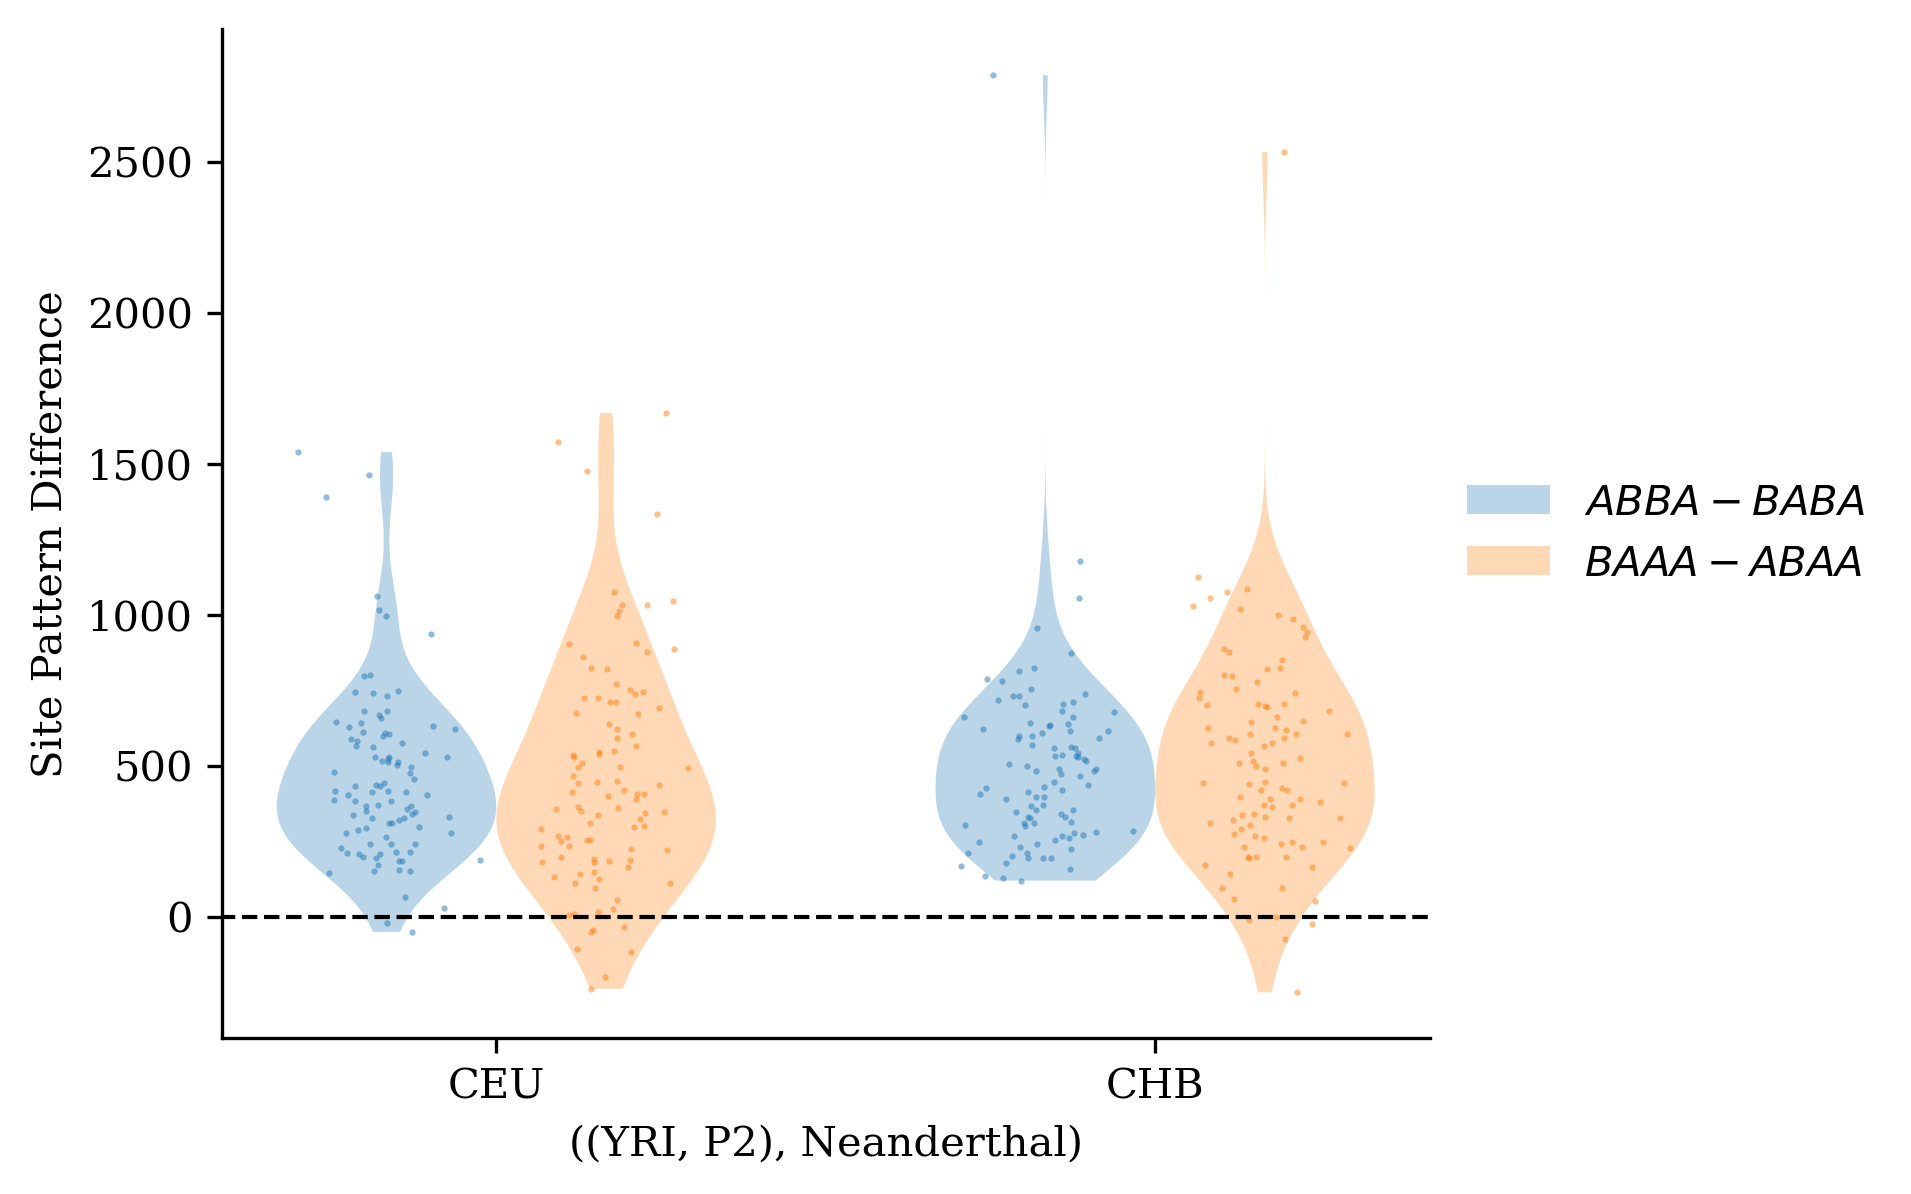

In [11]:
# Intialize list of x-axis tick labels.
all_x_ticks = ['CEU', 'CHB']
# Set the center positions.
all_oirginal_pos = np.arange(0, 6, 3)
all_center_pos = (all_oirginal_pos + 0.5)
# Set the positions for the abba-baba results.
all_abba_baba_pos = all_oirginal_pos
# Set the positions for the baaa-abaa results.
all_baaa_abaa_pos = (all_oirginal_pos + 1)
# Intialize the style.
plt.rcParams.update({'font.family': 'serif', 'font.size': 10})
# Intialize the figure.
fig = plt.figure(figsize=set_size(width_pt=452, fraction=1, subplots=(1, 1)), constrained_layout=True, dpi=300.0)
# Intialize the axis.
ax = fig.add_subplot(111)
# Plot horizontal line at y = 0.
ax.axhline(y=0, xmin=-1, xmax=31, color='black', linestyle='dashed', linewidth=1)
# Plot the results for the abba-baba statistic.
all_abba_baba_plot = ax.violinplot(all_abba_baba.tolist(), all_abba_baba_pos, vert=True, showextrema=False, widths=1)
# Set the index counter.
idx_counter = 0
# For every x-axis tick.
for i in all_abba_baba_pos:
    # Grab the simulate data points.
    y = all_abba_baba[idx_counter]
    # Move the index counter forward.
    idx_counter += 1
    # Add some jitter to the x-axis.
    x = np.random.normal(i, 0.15, size=len(y))
    # Plot the points!
    ax.scatter(x, y, color='tab:blue', marker='.', s=1, alpha=0.5)
# Plot the results for the Danc statistics.
all_baaa_abaa_plot = ax.violinplot(all_baaa_abaa.tolist(), all_baaa_abaa_pos, vert=True, showextrema=False, widths=1)
# Set the index counter.
idx_counter = 0
# For every x-axis tick.
for i in all_baaa_abaa_pos:
    # Grab the simulate data points.
    y = all_baaa_abaa[idx_counter]
    # Move the index counter forward.
    idx_counter += 1
    # Add some jitter to the x-axis.
    x = np.random.normal(i, 0.15, size=len(y))
    # Plot the points!
    ax.scatter(x, y, color='tab:orange', marker='.', s=1, alpha=0.5)
# Despine the axes.
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
# Make the legend.
ax.legend([all_abba_baba_plot['bodies'][0], all_baaa_abaa_plot['bodies'][0]], [r'$ABBA-BABA$', r'$BAAA-ABAA$'], loc='center left', bbox_to_anchor=(1.0, 0.5), frameon=False)
# Set the axes labels.
plt.xlabel('((YRI, P2), Neanderthal)')
plt.ylabel('Site Pattern Difference')
# Set the x-axis tick positions and labels.
ax.set_xticks(all_center_pos)
ax.set_xticklabels(all_x_ticks)
# Show!
plt.show()

## Power to Detect Introgression
First, we calculate and load the power values for each focal population.

In [12]:
# Calculate the power to decect introgression.
ceu_power_dict = calc_power('ceu')
chb_power_dict = calc_power('chb')

Next, we consolidate and summarize the observed values.

In [13]:
# Consolidate all introgression metrics results.
all_d = np.array([ceu_obs_vals['d'], chb_obs_vals['d']])
all_danc = np.array([ceu_obs_vals['danc'], chb_obs_vals['danc']])
all_dplus = np.array([ceu_obs_vals['dplus'], chb_obs_vals['dplus']])
# Intialize an array of all focal populations.
p2_pops = np.array(['P2 = CEU', 'P2 = CHB'])
# Create a pandas dataframe for the all focal populations.
detection_df = pd.DataFrame(
    data={
        r'$D \; (\mu)$': np.mean(all_d, axis=1),
        r'$D \; (\sigma)$': np.std(all_d, axis=1),
        r'$D_{anc} \; (\mu)$': np.mean(all_danc, axis=1),
        r'$D_{anc} \; (\sigma)$': np.std(all_danc, axis=1),
        r'$D+ \; (\mu)$': np.mean(all_dplus, axis=1),
        r'$D+ \; (\sigma)$': np.std(all_dplus, axis=1),
    },
    index=p2_pops,
)
detection_df = detection_df.style.format(precision=3)
detection_df

,$D \; (\mu)$,$D \; (\sigma)$,$D_{anc} \; (\mu)$,$D_{anc} \; (\sigma)$,$D+ \; (\mu)$,$D+ \; (\sigma)$
P2 = CEU,0.177,0.087,0.011,0.009,0.021,0.014
P2 = CHB,0.189,0.081,0.012,0.008,0.023,0.014


Next, we compile the power of each detection metric.

In [14]:
# Create power arrays for each detection metric.
all_power_d = np.array([ceu_power_dict['d'], chb_power_dict['d']])
all_power_danc = np.array([ceu_power_dict['danc'], chb_power_dict['danc']])
all_power_dplus = np.array([ceu_power_dict['dplus'], chb_power_dict['dplus']])
# Intialize an array of all focal populations.
p2_pops = np.array(['P2 = CEU', 'P2 = CHB'])
# Create a pandas dataframe for the all focal populations.
all_power_df = pd.DataFrame(
    data={
        r'$D$': all_power_d,
        r'$D_{anc}$': all_power_danc,
        r'$D+$': all_power_dplus,
    },
    index=p2_pops,
)
all_power_df = all_power_df.style.format(precision=3)
all_power_df

,$D$,$D_{anc}$,$D+$
P2 = CEU,0.940,0.520,0.770
P2 = CHB,0.960,0.620,0.850


Now we plot the detection results!

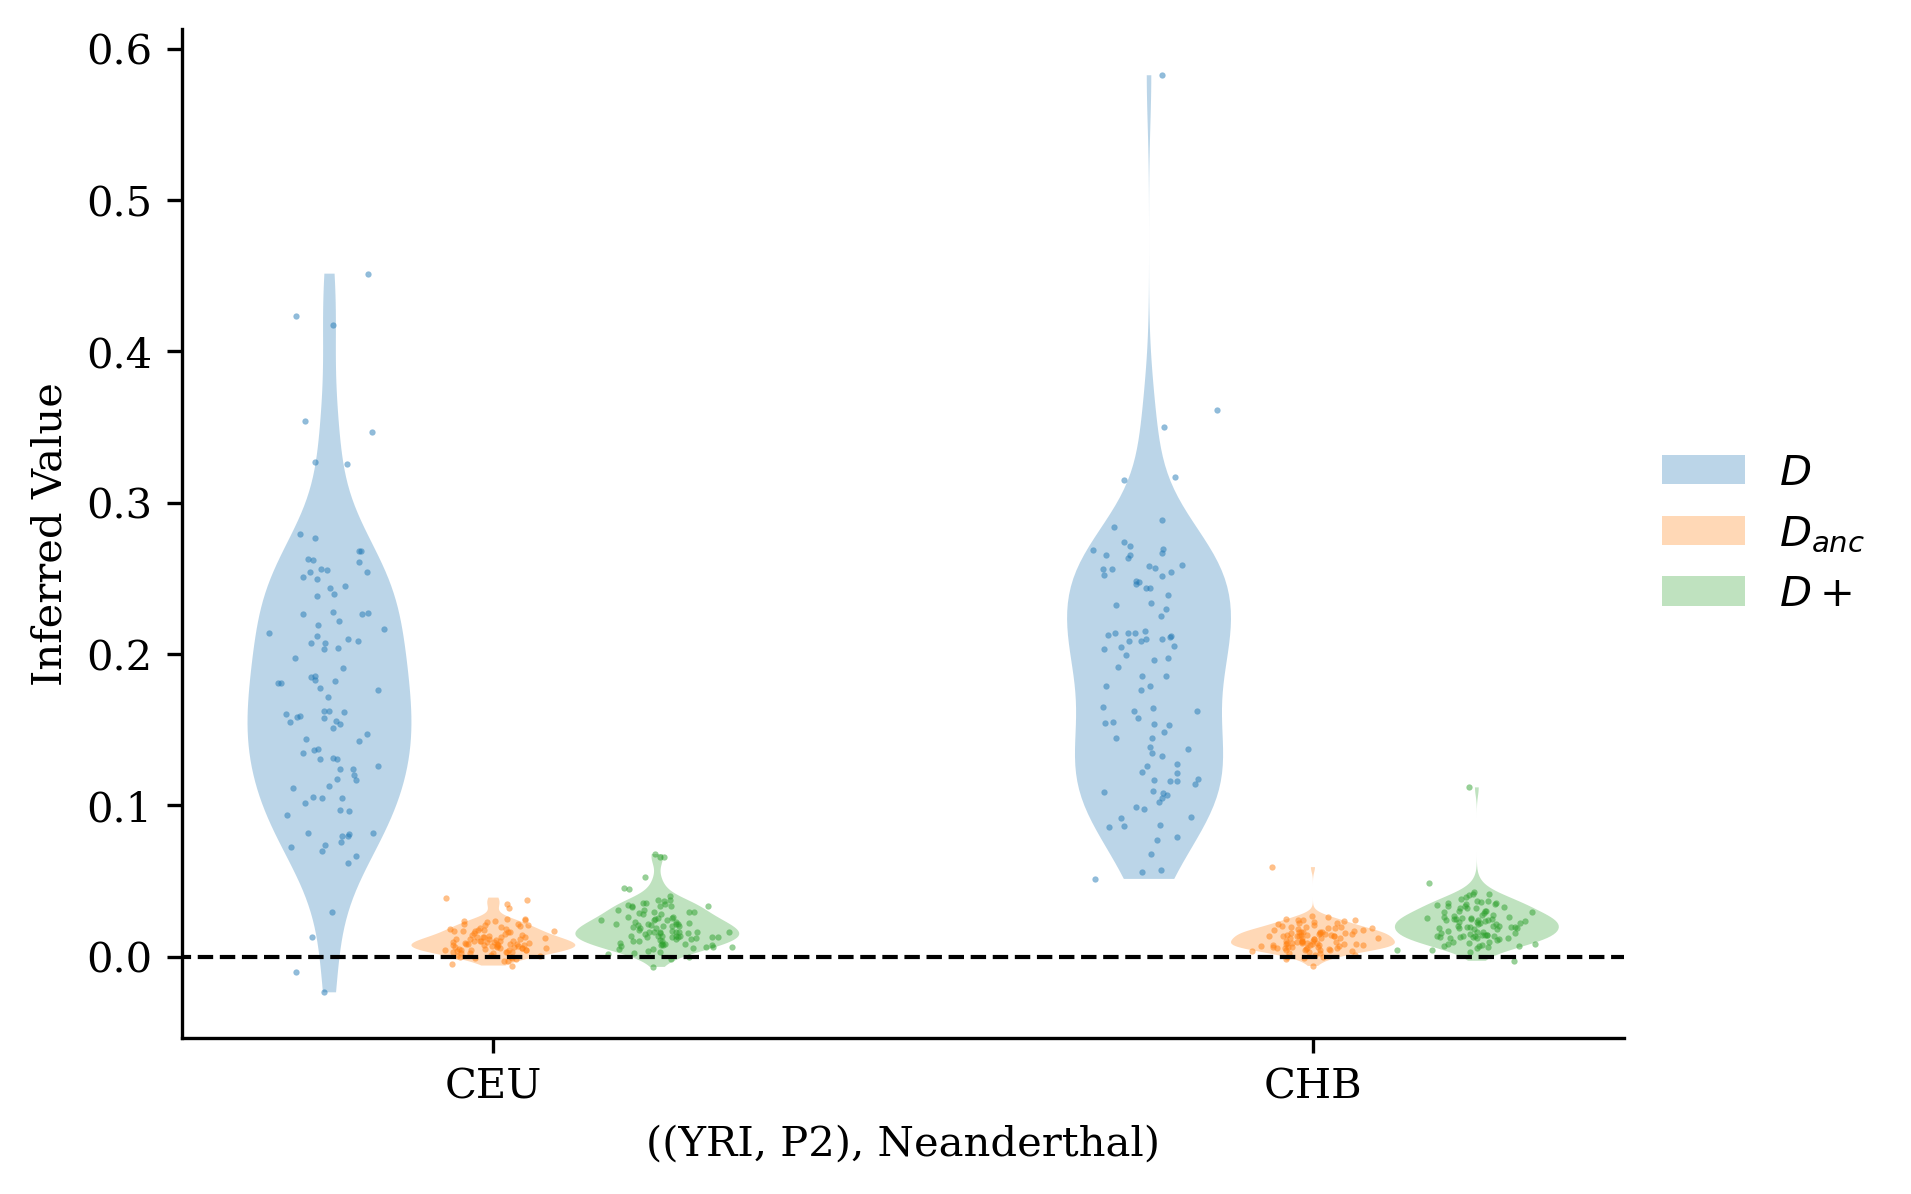

In [15]:
# Intialize list of x-axis tick labels.
all_x_ticks = ['CEU', 'CHB']
# Set the center positions.
all_center_pos = np.arange(0, 10, 5)
# Set the positions for the D results.
all_d_pos = (all_center_pos - 1)
# Set the positions for the Danc results.
all_danc_pos = all_center_pos
# Set the positions for the D+ results.
all_dplus_pos = (all_center_pos + 1)
# Intialize the style.
plt.rcParams.update({'font.family': 'serif', 'font.size': 10})
# Intialize the figure.
fig = plt.figure(figsize=set_size(width_pt=452, fraction=1, subplots=(1, 1)), constrained_layout=True, dpi=300.0)
# Intialize the axis.
ax = fig.add_subplot(111)
# Plot horizontal line at y = 0.
ax.axhline(y=0, xmin=-1, xmax=52, color='black', linestyle='dashed', linewidth=1)
# Plot the results for the D statistic.
all_d_plot = ax.violinplot(all_d.tolist(), all_d_pos, vert=True, showextrema=False, widths=1)
# Set the index counter.
idx_counter = 0
# For every x-axis tick.
for i in all_d_pos:
    # Grab the simulate data points.
    y = all_d[idx_counter]
    # Move the index counter forward.
    idx_counter += 1
    # Add some jitter to the x-axis.
    x = np.random.normal(i, 0.15, size=len(y))
    # Plot the points!
    ax.scatter(x, y, color='tab:blue', marker='.', s=1, alpha=0.5)
# Plot the results for the Danc statistics.
all_danc_plot = ax.violinplot(all_danc.tolist(), all_danc_pos, vert=True, showextrema=False, widths=1)
# Set the index counter.
idx_counter = 0
# For every x-axis tick.
for i in all_danc_pos:
    # Grab the simulate data points.
    y = all_danc[idx_counter]
    # Move the index counter forward.
    idx_counter += 1
    # Add some jitter to the x-axis.
    x = np.random.normal(i, 0.15, size=len(y))
    # Plot the points!
    ax.scatter(x, y, color='tab:orange', marker='.', s=1, alpha=0.5)
# Plot the results for the D+ statistics.
all_dplus_plot = ax.violinplot(all_dplus.tolist(), all_dplus_pos, vert=True, showextrema=False, widths=1)
# Set the index counter.
idx_counter = 0
# For every x-axis tick.
for i in all_dplus_pos:
    # Grab the simulate data points.
    y = all_dplus[idx_counter]
    # Move the index counter forward.
    idx_counter += 1
    # Add some jitter to the x-axis.
    x = np.random.normal(i, 0.15, size=len(y))
    # Plot the points!
    ax.scatter(x, y, color='tab:green', marker='.', s=1, alpha=0.5)
# Despine the axes.
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
# Make the legend.
ax.legend([all_d_plot['bodies'][0], all_danc_plot['bodies'][0], all_dplus_plot['bodies'][0]], [r'$D$', r'$D_{anc}$', r'$D+$'], loc='center left', bbox_to_anchor=(1.0, 0.5), frameon=False)
# Set the axes labels.
plt.xlabel('((YRI, P2), Neanderthal)')
plt.ylabel('Inferred Value')
# Set the x-axis tick positions and labels.
ax.set_xticks(all_center_pos)
ax.set_xticklabels(all_x_ticks)
# Show!
plt.show()

## Power to Quantify Introgression
First, we consolidate and summarize the observed values.

In [16]:
# Consolidate all introgression metrics results.
all_fhom = np.array([ceu_obs_vals['fhom'], chb_obs_vals['fhom']])
all_fanc = np.array([ceu_obs_vals['fanc'], chb_obs_vals['fanc']])
all_fplus = np.array([ceu_obs_vals['fplus'], chb_obs_vals['fplus']])
# Intialize an array of all focal populations.
p2_pops = np.array(['P2 = CEU', 'P2 = CHB'])
# Create a pandas dataframe for the all focal populations.
quantification_df = pd.DataFrame(
    data={
        r'$f_{hom} \; (\mu)$': np.mean(all_fhom, axis=1),
        r'$f_{hom} \; (\sigma)$': np.std(all_fhom, axis=1),
        r'$f_{anc} \; (\mu)$': np.mean(all_fanc, axis=1),
        r'$f_{anc} \; (\sigma)$': np.std(all_fanc, axis=1),
        r'$f+ \; (\mu)$': np.mean(all_fplus, axis=1),
        r'$f+ \; (\sigma)$': np.std(all_fplus, axis=1),
    },
    index=p2_pops,
)
quantification_df = quantification_df.style.format(precision=3)
quantification_df

,$f_{hom} \; (\mu)$,$f_{hom} \; (\sigma)$,$f_{anc} \; (\mu)$,$f_{anc} \; (\sigma)$,$f+ \; (\mu)$,$f+ \; (\sigma)$
P2 = CEU,0.012,0.007,0.012,0.009,0.012,0.008
P2 = CHB,0.013,0.008,0.013,0.009,0.013,0.008


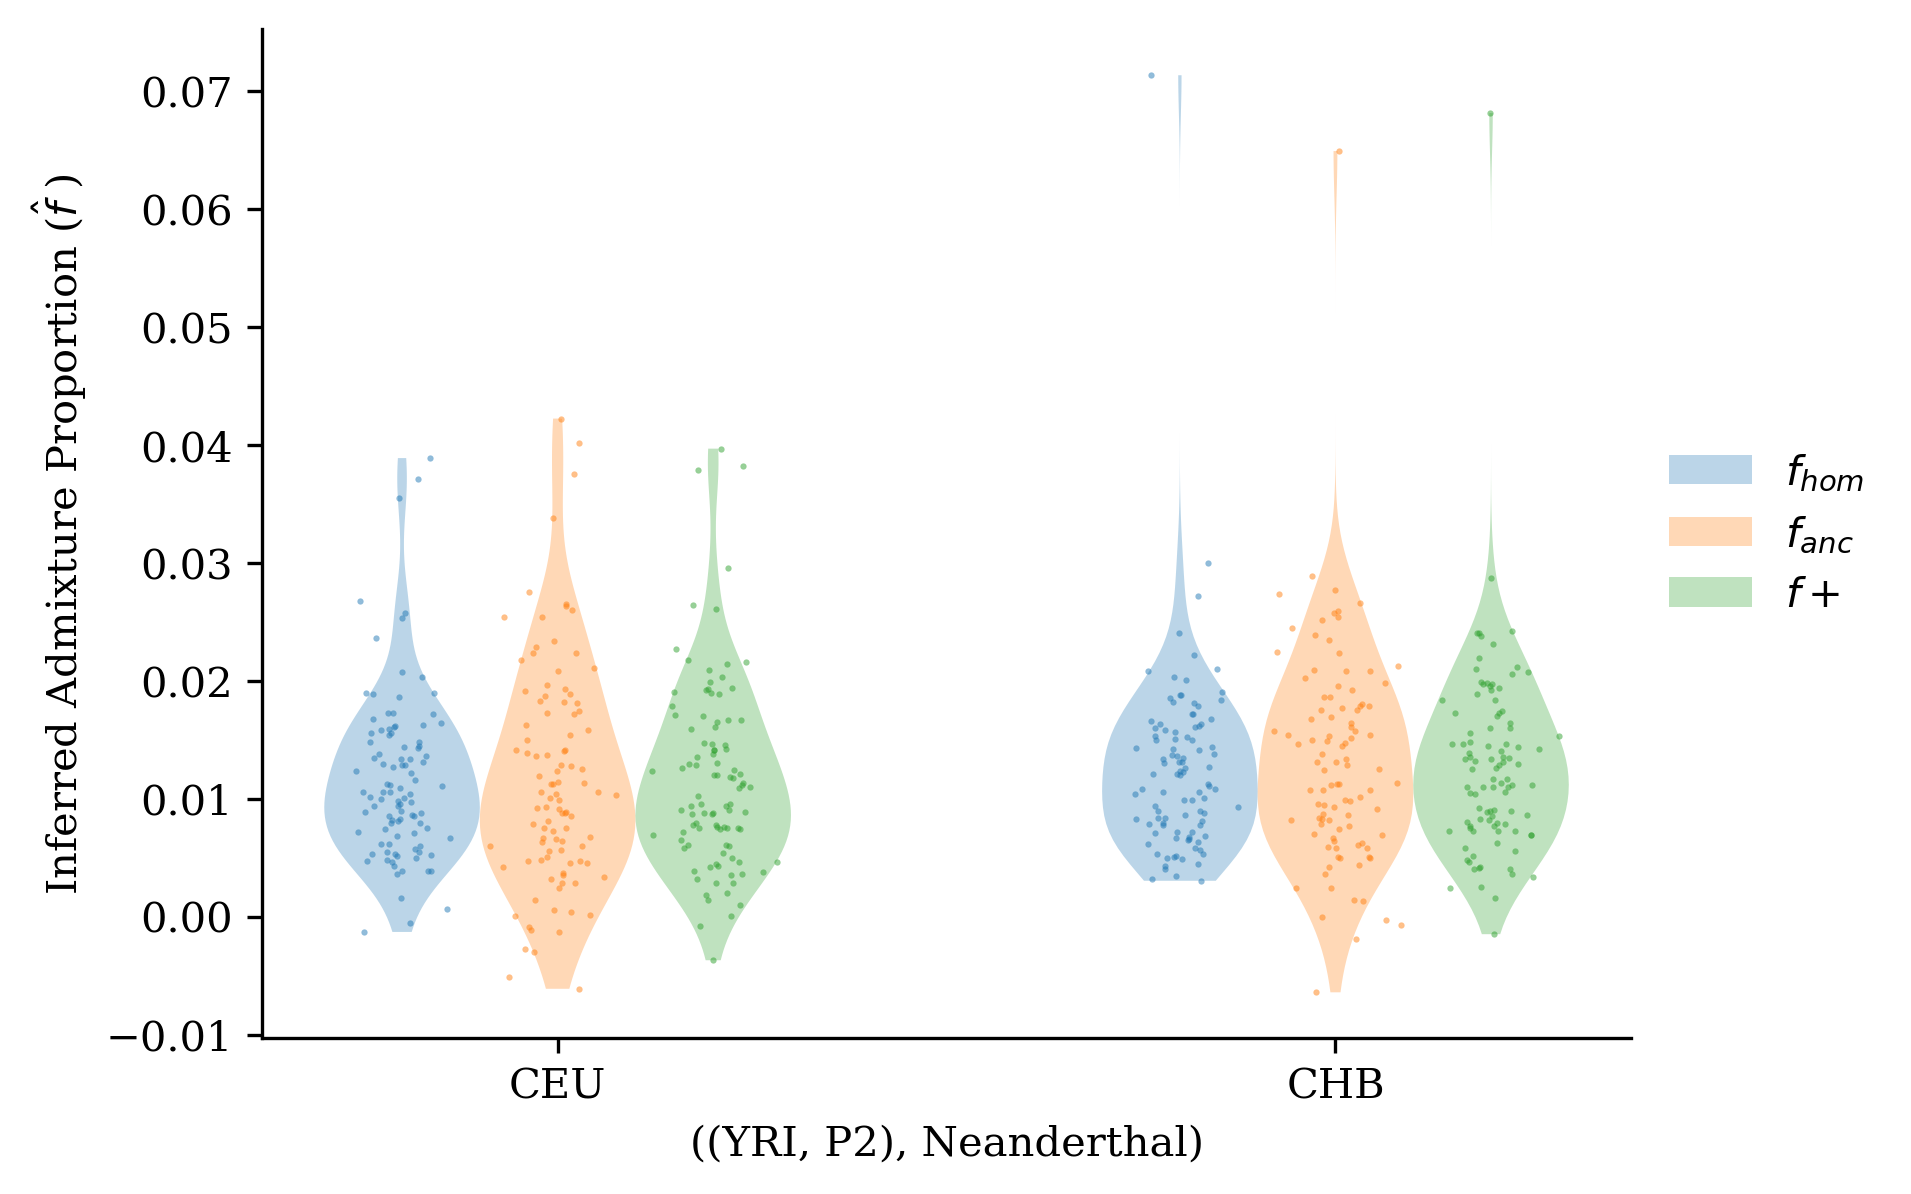

In [17]:
# Intialize list of x-axis tick labels.
all_x_ticks = ['CEU', 'CHB']
# Set the center positions.
all_center_pos = np.arange(0, 10, 5)
# Set the positions for the D results.
all_fhom_pos = (all_center_pos - 1)
# Set the positions for the Danc results.
all_fanc_pos = all_center_pos
# Set the positions for the D+ results.
all_fplus_pos = (all_center_pos + 1)
# Intialize the style.
plt.rcParams.update({'font.family': 'serif', 'font.size': 10})
# Intialize the figure.
fig = plt.figure(figsize=set_size(width_pt=452, fraction=1, subplots=(1, 1)), constrained_layout=True, dpi=300.0)
# Intialize the axis.
ax = fig.add_subplot(111)
# Plot the results for the D statistic.
all_fhom_plot = ax.violinplot(all_fhom.tolist(), all_fhom_pos, vert=True, showextrema=False, widths=1)
# Set the index counter.
idx_counter = 0
# For every x-axis tick.
for i in all_fhom_pos:
    # Grab the simulate data points.
    y = all_fhom[idx_counter]
    # Move the index counter forward.
    idx_counter += 1
    # Add some jitter to the x-axis.
    x = np.random.normal(i, 0.15, size=len(y))
    # Plot the points!
    ax.scatter(x, y, color='tab:blue', marker='.', s=1, alpha=0.5)
# Plot the results for the Danc statistics.
all_fanc_plot = ax.violinplot(all_fanc.tolist(), all_fanc_pos, vert=True, showextrema=False, widths=1)
# Set the index counter.
idx_counter = 0
# For every x-axis tick.
for i in all_fanc_pos:
    # Grab the simulate data points.
    y = all_fanc[idx_counter]
    # Move the index counter forward.
    idx_counter += 1
    # Add some jitter to the x-axis.
    x = np.random.normal(i, 0.15, size=len(y))
    # Plot the points!
    ax.scatter(x, y, color='tab:orange', marker='.', s=1, alpha=0.5)
# Plot the results for the D+ statistics.
all_fplus_plot = ax.violinplot(all_fplus.tolist(), all_fplus_pos, vert=True, showextrema=False, widths=1)
# Set the index counter.
idx_counter = 0
# For every x-axis tick.
for i in all_fplus_pos:
    # Grab the simulate data points.
    y = all_fplus[idx_counter]
    # Move the index counter forward.
    idx_counter += 1
    # Add some jitter to the x-axis.
    x = np.random.normal(i, 0.15, size=len(y))
    # Plot the points!
    ax.scatter(x, y, color='tab:green', marker='.', s=1, alpha=0.5)
# Despine the axes.
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
# Make the legend.
ax.legend([all_fhom_plot['bodies'][0], all_fanc_plot['bodies'][0], all_fplus_plot['bodies'][0]], [r'$f_{hom}$', r'$f_{anc}$', r'$f+$'], loc='center left', bbox_to_anchor=(1.0, 0.5), frameon=False)
# Set the axes labels.
plt.xlabel('((YRI, P2), Neanderthal)')
plt.ylabel('Inferred Admixture Proportion ('+r'$\hat{f}$'+' )')
# Set the x-axis tick positions and labels.
ax.set_xticks(all_center_pos)
ax.set_xticklabels(all_x_ticks)
# Show!
plt.show()